In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [77]:
mean1=np.array([1,0.5])
cov1=np.array([[1,0.1],[0.1,1.2]])
mean2=np.array([4,5])
cov2=np.array([[1.21,0.1],[0.1,1.3]])
dist1=np.random.multivariate_normal(mean1,cov1,500)
dist2=np.random.multivariate_normal(mean2,cov2,500)

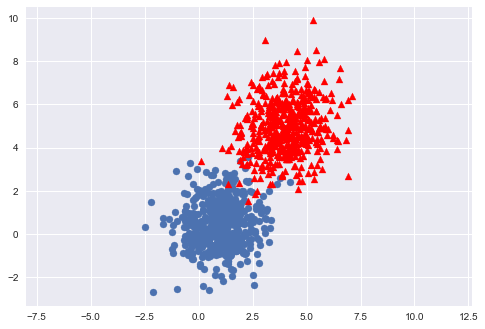

In [78]:
x,y=np.random.multivariate_normal(mean1,cov1,500).T
X,Y=np.random.multivariate_normal(mean2,cov2,500).T
plt.scatter(x,y)
plt.scatter(X,Y,color='red',marker='^')
plt.axis('equal')
plt.show()

In [79]:
data=np.zeros((1000,3))
data[:500,:-1]=dist1
data[500:,:2]=dist2
data[500:,-1]=1.0
print(data)

[[ 0.90787285  0.78757886  0.        ]
 [ 1.07193425  1.42385849  0.        ]
 [ 0.04771501 -0.24948842  0.        ]
 ...
 [ 4.01284968  4.30401313  1.        ]
 [ 3.54831497  4.54415333  1.        ]
 [ 3.13631134  5.79814393  1.        ]]


In [80]:
split=int(0.8*data.shape[0])
X_train=data[:split,:-1]
X_test=data[split:,:-1]
Y_train=data[:split,-1]
Y_test=data[split:,-1]

In [81]:
def hypothesis(x,w,b):
    hx=np.dot(x,w)+b
    return sigmoid(hx)
def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [82]:
def error(y,x,w,b):
    m=x.shape[0]
    err=0.0
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

In [83]:
def get_grad(x,w,b,y):
    grad_b= 0.0
    grad_w = np.zeros(w.shape)
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],w,b)
        grad_w += (y[i] - hx)*x[i]
        grad_b += (y[i] - hx)
    grad_w /= m
    grad_b /= m
    return [grad_w,grad_b]

In [84]:
def gradient_ascent(x,y,w,b,learning_rate=0.01):
    err = error(y,x,w,b)
    [grad_w,grad_b]= get_grad(x,w,b,y)
    w = w + learning_rate*grad_w
    b = b + learning_rate*grad_b
    return err,w,b

In [85]:
def predict(x,w,b):
    confidence= hypothesis(x,w,b)
    if confidence < 0.5:
        return 0
    else:
        return 1

In [86]:
def get_acc(x_tst,y_tst,w,b):
    y_pred= []
    for i in range(y_tst.shape[0]):
        p=predict(x_tst[i],w,b)
        y_pred.append(p)
    y_pred = np.array(y_pred)
    return float((y_pred==y_tst).sum()/y_tst.shape[0])

In [87]:
loss = []
acc= []
W= 2*np.random.random((X_train.shape[1],))
b= 5*np.random.random()

In [88]:
for i in range(1000):
    l,W,b= gradient_ascent(X_train,Y_train,W,b,learning_rate=0.1)
    acc.append(get_acc(X_test,Y_test,W,b))
    loss.append(l)

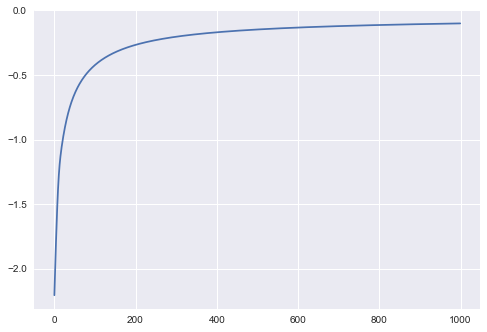

In [89]:
plt.plot(loss)
plt.show()

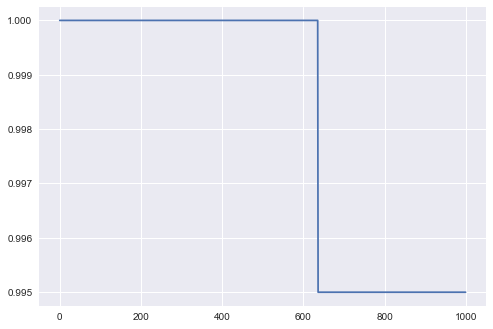

In [90]:
plt.plot(acc)

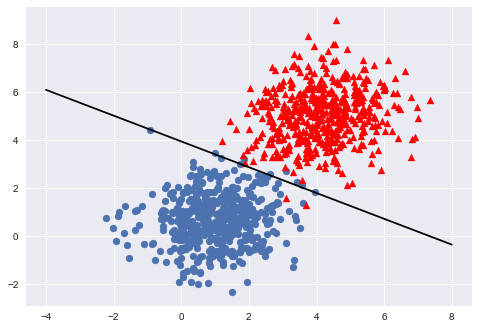

In [91]:
plt.figure(0)

x,y=np.random.multivariate_normal(mean1,cov1,500).T
X,Y=np.random.multivariate_normal(mean2,cov2,500).T
plt.scatter(x,y)
plt.scatter(X,Y,color='red',marker='^')



r = np.linspace(-4,8,10)
o = -(W[0]*r + b)/W[1]
plt.plot(r,o,color='k')
plt.show()